In [8]:
##########################################################################
# Created on Sat Nov 15 23:14:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

### Defination

$$\mathit{\Theta}=\frac{\partial \mathit{\Pi}}{\partial T}\tag{12-13}$$
where,\
$\Theta$:Option theta\
$\mathit{\Pi}$:Option price\
$T$:Option tenor

# 12.3.1.Theta of European option

### 1.Mathimatical expression

For European call option,
$$\mathit{\Theta_{call}}=-\frac{S_0N'(d_1)\sigma}{2\sqrt{T}}-rKe^{-rT}N(d_2)\tag{12-14}$$
where,\
$d_1=\frac{ln(S_0/K)+(r+\sigma ^2/2)T}{\sigma \sqrt{T}}$\
$d_2=\frac{ln(S_0/K)+(r-\sigma ^2/2)T}{\sigma \sqrt{T}}=d_1-\sigma\sqrt{T}$\
$N'(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$\
After rearrangement,\
$$\mathit{\Theta_{call}}=-\frac{S_0\sigma e^{-{d_1}^2/2}}{2\sqrt{2\pi T}}-rKe^{-rT}N(d_2)\tag{12-15}$$

For European put option,
$$\mathit{\Theta_{put}}=-\frac{S_0N'(d_1)\sigma}{2\sqrt{T}}+rKe^{-rT}N(-d_2)=\mathit{\Theta_{call}}+rKe^{-rT}\tag{12-16}$$

### 2.Implementation

In [9]:
def theta_EurOpt(S,K,sigma,r,T,optype):
    '''Define a function to calculate theta of European option.
    S:underlying price
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    optype:type of option. 'call' indicates call option otherwise put option'''
    from scipy.stats import norm
    from numpy import exp,log,pi,sqrt
    
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    d2=d1-sigma*sqrt(T)
    
    theta_call=-(S*sigma*exp(-pow(d1,2)/2))/(2*sqrt(2*pi*T))-r*K*exp(-r*T)*norm.cdf(d2)
    theta_put=theta_call+r*K*exp(-r*T)
    
    if optype=='call':
        theta=theta_call
    else:
        theta=theta_put
    return theta

In [10]:
day1=365
day2=252

S_ABC=3.27
K_ABC=3.6
sigma_ABC=0.19
shibor_6M=0.02377
T_ABC=0.5

theta_EurCall=theta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call')
theta_EurPut=theta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put')

print('Theta of European call option of ABC is',round(theta_EurCall,6))
print('Daily(Calendar) Theta of European call option of ABC is',round(theta_EurCall/day1,6))
print('Daily(Business) Theta of European call option of ABC is',round(theta_EurCall/day2,6))
print('Theta of European put option of ABC is',round(theta_EurPut,6))
print('Daily(Calendar) Theta of European put option of ABC is',round(theta_EurPut/day1,6))
print('Daily(Business) Theta of European put option of ABC is',round(theta_EurPut/day2,6))

Theta of European call option of ABC is -0.170442
Daily(Calendar) Theta of European call option of ABC is -0.000467
Daily(Business) Theta of European call option of ABC is -0.000676
Theta of European put option of ABC is -0.085881
Daily(Calendar) Theta of European put option of ABC is -0.000235
Daily(Business) Theta of European put option of ABC is -0.000341


# 12.3.2.Relationship between underlying price,tenor and Theta

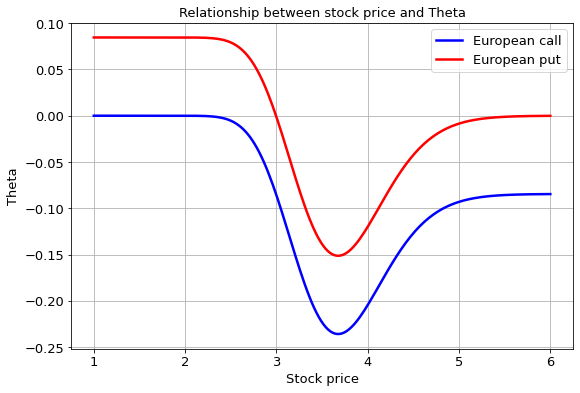

In [11]:
import matplotlib.pyplot as plt
import numpy as np

S_list2=np.linspace(1.0,6.0,200)

theta_EurCall_list=theta_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call')
theta_EurPut_list=theta_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put')

plt.figure(figsize=(9,6))
plt.plot(S_list2,theta_EurCall_list,'b-',label='European call',lw=2.5)
plt.plot(S_list2,theta_EurPut_list,'r-',label='European put',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Theta',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between stock price and Theta',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

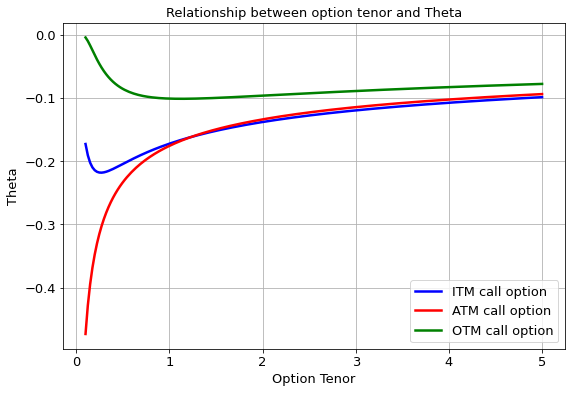

In [12]:
S1=4.0 #In the money call
S2=3.6 #At the money call
S3=3.0 #Out the money call

T_list=np.linspace(0.1,5.0,200)

theta_list1=theta_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')
theta_list2=theta_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')
theta_list3=theta_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')

plt.figure(figsize=(9,6))
plt.plot(T_list,theta_list1,'b-',label='ITM call option',lw=2.5)
plt.plot(T_list,theta_list2,'r-',label='ATM call option',lw=2.5)
plt.plot(T_list,theta_list3,'g-',label='OTM call option',lw=2.5)
plt.xlabel('Option Tenor',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Theta',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option tenor and Theta',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 12.3.3.Theta of American option

### Defination

$$\mathit{\Theta}=\frac{\Delta \mathit{\Pi}}{\Delta T}\tag{12-17}$$

$$\mathit{\Theta}=\frac{\mathit{\Pi_{2,1}}-\mathit{\Pi}}{2\Delta t}\tag{12-18}$$

### Option value matrix

$$\begin{bmatrix}
\mathit{\Pi} & \mathit{\Pi_{1,1}} & \mathit{\Pi_{2,2}} & \ldots & \mathit{\Pi_{N-1,N-1}} & \mathit{\Pi_{N,N}} \\
0            & \mathit{\Pi_{1,0}} & \mathit{\Pi_{2,1}} & \ldots & \mathit{\Pi_{N-1,N-2}} & \mathit{\Pi_{N,N-1}} \\
0            & 0                  & \mathit{\Pi_{2,0}} & \ldots & \mathit{\Pi_{N-1,N-3}} & \mathit{\Pi_{N,N-2}} \\
\vdots       & \vdots             & \vdots             & \ddots & \vdots                 & \vdots             \\
0            & 0                  & 0                  & \ldots & \mathit{\Pi_{N-1,0}}   & \mathit{\Pi_{N,1}} \\
0            & 0                  & 0                  & \ldots & 0                      & \mathit{\Pi_{N,0}}
\end{bmatrix}$$

In [13]:
def theta_AmerCall(S,K,sigma,r,T,N):
    '''Define a function to calculate American call option Theta using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model'''

    import numpy as np
    
    # Step1:Calculate relevant parameters
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    call_matrix=np.zeros((N+1,N+1))
    
    # Step2:Calculate the underlying asset price and option value at the option maturity node
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    call_matrix[:,-1]=np.maximum(S_end-K,0)
    
    #Step3:Calculate the underlying asset price and option value at the non maturity node of the option
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        call_strike=np.maximum(Si-K,0)
        call_nostrike=(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])*np.exp(-r*t)
        call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
    
    Theta=(call_matrix[1,2]-call_matrix[0,0])/(2*t)
    
    return Theta

In [14]:
def theta_AmerPut(S,K,sigma,r,T,N):
    '''Define a function to calculate American put option Theta using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model'''

    import numpy as np
    
    # Step1:Calculate relevant parameters
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    put_matrix=np.zeros((N+1,N+1))
    
    # Step2:Calculate the underlying asset price and option value at the option maturity node
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    put_matrix[:,-1]=np.maximum(K-S_end,0)
    
    #Step3:Calculate the underlying asset price and option value at the non maturity node of the option
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        put_strike=np.maximum(K-Si,0)
        put_nostrike=(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1])*np.exp(-r*t)
        put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
    
    Theta=(put_matrix[1,2]-put_matrix[0,0])/(2*t)
    
    return Theta

In [15]:
step=100

theta_AmerOpt1=theta_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
theta_AmerOpt2=theta_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)

print('Theta of American call option of ABC is ',round(theta_AmerOpt1,4))
print('Theta of American put option of ABC is ',round(theta_AmerOpt2,4))

Theta of American call option of ABC is  -0.1707
Theta of American put option of ABC is  -0.1005
